In [1]:
#NIBM
import os
import cv2
import xml.etree.ElementTree as ET

def extract_and_resize_objects(images_dir, annotations_dir, save_dir, target_size=(224, 224)):
    os.makedirs(save_dir, exist_ok=True)

    for xml_file in os.listdir(annotations_dir):
        if not xml_file.endswith(".xml"):
            continue

        xml_path = os.path.join(annotations_dir, xml_file)
        tree = ET.parse(xml_path)
        root = tree.getroot()

        filename = root.find("filename").text
        image_path = os.path.join(images_dir, filename)

        if not os.path.exists(image_path):
            print(f" Image not found: {image_path}")
            continue

        image = cv2.imread(image_path)

        for i, obj in enumerate(root.findall("object")):
            name = obj.find("name").text.lower()

            bndbox = obj.find("bndbox")
            xmin = int(float(bndbox.find("xmin").text))
            ymin = int(float(bndbox.find("ymin").text))
            xmax = int(float(bndbox.find("xmax").text))
            ymax = int(float(bndbox.find("ymax").text))

            
            cropped = image[ymin:ymax, xmin:xmax]

            if cropped.size == 0:
                print(f" Empty crop in {filename}, skipping.")
                continue

            
            resized = cv2.resize(cropped, target_size)

            
            base_name = os.path.splitext(xml_file)[0]
            save_filename = f"{base_name}_{name}_{i}.jpg"
            save_path = os.path.join(save_dir, save_filename)
            cv2.imwrite(save_path, resized)
            print(f"Saved: {save_path}")

    print("All NIBM object crops resized and saved successfully.")


extract_and_resize_objects(
    images_dir="/home/yukthi-de/Desktop/TEST CW_2/numberplate/Images_Dataset/new_dataset/NIBM-Images",
    annotations_dir="/home/yukthi-de/Desktop/TEST CW_2/numberplate/Images_Dataset/new_dataset/NIBM-Annotations",
    save_dir="/home/yukthi-de/Desktop/TEST CW_2/numberplate/Images_Dataset/new_dataset/cropped/NIBM",
    target_size=(224, 224)  
)


Saved: /home/yukthi-de/Desktop/TEST CW_2/numberplate/Images_Dataset/new_dataset/cropped/NIBM/3e8ecfa3-XW-9601NIBM-FRONT_bike_0.jpg
Saved: /home/yukthi-de/Desktop/TEST CW_2/numberplate/Images_Dataset/new_dataset/cropped/NIBM/3bebdb46-CAU-4203NIBM-BACK_car_0.jpg
Saved: /home/yukthi-de/Desktop/TEST CW_2/numberplate/Images_Dataset/new_dataset/cropped/NIBM/a12e207b-BIA-2062NIBM-FRONT_bike_0.jpg
Saved: /home/yukthi-de/Desktop/TEST CW_2/numberplate/Images_Dataset/new_dataset/cropped/NIBM/eaad5f45-XK-3029NIBM-BACK_bike_0.jpg
Saved: /home/yukthi-de/Desktop/TEST CW_2/numberplate/Images_Dataset/new_dataset/cropped/NIBM/c1286522-CBK-6998NIBM-FRONT_car_0.jpg
Saved: /home/yukthi-de/Desktop/TEST CW_2/numberplate/Images_Dataset/new_dataset/cropped/NIBM/d50ed22f-CAV-7667NIBM-FRONT_car_0.jpg
Saved: /home/yukthi-de/Desktop/TEST CW_2/numberplate/Images_Dataset/new_dataset/cropped/NIBM/2cda6e2d-KY-2438NIBM-BACK_car_0.jpg
Saved: /home/yukthi-de/Desktop/TEST CW_2/numberplate/Images_Dataset/new_dataset/croppe

In [2]:
import os
import cv2
import albumentations as A

cropped_dir = "/home/yukthi-de/Desktop/TEST CW_2/numberplate/Images_Dataset/new_dataset/cropped/NIBM"
augmented_dir = "/home/yukthi-de/Desktop/TEST CW_2/numberplate/Images_Dataset/new_dataset/augmented/NIBM"
os.makedirs(augmented_dir, exist_ok=True)


transform = A.Compose([
    A.HorizontalFlip(p=0.5),
    A.VerticalFlip(p=0.2),
    A.RandomRotate90(p=0.5),
    A.ShiftScaleRotate(shift_limit=0.05, scale_limit=0.1, rotate_limit=15, p=0.5),
    A.RandomBrightnessContrast(brightness_limit=0.2, contrast_limit=0.2, p=0.5),
    A.GaussNoise(var_limit=(10.0, 50.0), p=0.3),
])


for img_file in os.listdir(cropped_dir):
    if not img_file.lower().endswith((".jpg", ".jpeg", ".png")):
        continue

    img_path = os.path.join(cropped_dir, img_file)
    image = cv2.imread(img_path)

    if image is None:
        print(f" Could not read: {img_path}")
        continue

    
    for i in range(10):  
        augmented = transform(image=image)["image"]

        
        save_filename = f"{os.path.splitext(img_file)[0]}_aug{i+1}.jpg"
        save_path = os.path.join(augmented_dir, save_filename)
        cv2.imwrite(save_path, augmented)

        print(f" Saved: {save_path}")

print(" All augmentations completed!")


/home/yukthi-de/Desktop/TEST CW_2/numberplate/lib/python3.12/site-packages/albumentations/core/validation.py:114: UserWarning: ShiftScaleRotate is a special case of Affine transform. Please use Affine transform instead.
  original_init(self, **validated_kwargs)
/tmp/ipykernel_10206/4243580561.py:16: UserWarning: Argument(s) 'var_limit' are not valid for transform GaussNoise
  A.GaussNoise(var_limit=(10.0, 50.0), p=0.3),


 Saved: /home/yukthi-de/Desktop/TEST CW_2/numberplate/Images_Dataset/new_dataset/augmented/NIBM/3e8ecfa3-XW-9601NIBM-FRONT_bike_0_aug1.jpg
 Saved: /home/yukthi-de/Desktop/TEST CW_2/numberplate/Images_Dataset/new_dataset/augmented/NIBM/3e8ecfa3-XW-9601NIBM-FRONT_bike_0_aug2.jpg
 Saved: /home/yukthi-de/Desktop/TEST CW_2/numberplate/Images_Dataset/new_dataset/augmented/NIBM/3e8ecfa3-XW-9601NIBM-FRONT_bike_0_aug3.jpg
 Saved: /home/yukthi-de/Desktop/TEST CW_2/numberplate/Images_Dataset/new_dataset/augmented/NIBM/3e8ecfa3-XW-9601NIBM-FRONT_bike_0_aug4.jpg
 Saved: /home/yukthi-de/Desktop/TEST CW_2/numberplate/Images_Dataset/new_dataset/augmented/NIBM/3e8ecfa3-XW-9601NIBM-FRONT_bike_0_aug5.jpg
 Saved: /home/yukthi-de/Desktop/TEST CW_2/numberplate/Images_Dataset/new_dataset/augmented/NIBM/3e8ecfa3-XW-9601NIBM-FRONT_bike_0_aug6.jpg
 Saved: /home/yukthi-de/Desktop/TEST CW_2/numberplate/Images_Dataset/new_dataset/augmented/NIBM/3e8ecfa3-XW-9601NIBM-FRONT_bike_0_aug7.jpg
 Saved: /home/yukthi-de/Des

In [3]:
#Non-NIBM

import os
import cv2
import xml.etree.ElementTree as ET

def extract_and_resize_objects(images_dir, annotations_dir, save_dir, target_size=(224, 224)):
    os.makedirs(save_dir, exist_ok=True)

    for xml_file in os.listdir(annotations_dir):
        if not xml_file.endswith(".xml"):
            continue

        xml_path = os.path.join(annotations_dir, xml_file)
        tree = ET.parse(xml_path)
        root = tree.getroot()

        filename = root.find("filename").text
        image_path = os.path.join(images_dir, filename)

        if not os.path.exists(image_path):
            print(f" Image not found: {image_path}")
            continue

        image = cv2.imread(image_path)

        for i, obj in enumerate(root.findall("object")):
            name = obj.find("name").text.lower()

            bndbox = obj.find("bndbox")
            xmin = int(float(bndbox.find("xmin").text))
            ymin = int(float(bndbox.find("ymin").text))
            xmax = int(float(bndbox.find("xmax").text))
            ymax = int(float(bndbox.find("ymax").text))

            
            cropped = image[ymin:ymax, xmin:xmax]

            if cropped.size == 0:
                print(f"Empty crop in {filename}, skipping.")
                continue

            
            resized = cv2.resize(cropped, target_size)

            
            base_name = os.path.splitext(xml_file)[0]
            save_filename = f"{base_name}_{name}_{i}.jpg"
            save_path = os.path.join(save_dir, save_filename)
            cv2.imwrite(save_path, resized)
            print(f"Saved: {save_path}")

    print("All NIBM object crops resized and saved successfully.")


extract_and_resize_objects(
    images_dir="/home/yukthi-de/Desktop/TEST CW_2/numberplate/Images_Dataset/new_dataset/Non-NIBM-Images",
    annotations_dir="/home/yukthi-de/Desktop/TEST CW_2/numberplate/Images_Dataset/new_dataset/Non-NIBM-Annotations",
    save_dir="/home/yukthi-de/Desktop/TEST CW_2/numberplate/Images_Dataset/new_dataset/cropped/Non-NIBM",
    target_size=(224, 224)  
)


Saved: /home/yukthi-de/Desktop/TEST CW_2/numberplate/Images_Dataset/new_dataset/cropped/Non-NIBM/57863c19-221_car_0.jpg
Saved: /home/yukthi-de/Desktop/TEST CW_2/numberplate/Images_Dataset/new_dataset/cropped/Non-NIBM/0afb1cb4-145_car_0.jpg
Saved: /home/yukthi-de/Desktop/TEST CW_2/numberplate/Images_Dataset/new_dataset/cropped/Non-NIBM/bf772fda-245_car_0.jpg
Saved: /home/yukthi-de/Desktop/TEST CW_2/numberplate/Images_Dataset/new_dataset/cropped/Non-NIBM/32a87b84-154_car_0.jpg
Saved: /home/yukthi-de/Desktop/TEST CW_2/numberplate/Images_Dataset/new_dataset/cropped/Non-NIBM/e950d9ae-132_car_0.jpg
Saved: /home/yukthi-de/Desktop/TEST CW_2/numberplate/Images_Dataset/new_dataset/cropped/Non-NIBM/4daace13-189_car_0.jpg
Saved: /home/yukthi-de/Desktop/TEST CW_2/numberplate/Images_Dataset/new_dataset/cropped/Non-NIBM/63d8f8ef-126_car_0.jpg
Saved: /home/yukthi-de/Desktop/TEST CW_2/numberplate/Images_Dataset/new_dataset/cropped/Non-NIBM/54c8f22c-252_car_0.jpg
Saved: /home/yukthi-de/Desktop/TEST CW_2

In [4]:
import os
import cv2
import albumentations as A

cropped_dir = "/home/yukthi-de/Desktop/TEST CW_2/numberplate/Images_Dataset/new_dataset/cropped/Non-NIBM"
augmented_dir = "/home/yukthi-de/Desktop/TEST CW_2/numberplate/Images_Dataset/new_dataset/augmented/Non-NIBM"
os.makedirs(augmented_dir, exist_ok=True)


transform = A.Compose([
    A.HorizontalFlip(p=0.5),
    A.VerticalFlip(p=0.2),
    A.RandomRotate90(p=0.5),
    A.ShiftScaleRotate(shift_limit=0.05, scale_limit=0.1, rotate_limit=15, p=0.5),
    A.RandomBrightnessContrast(brightness_limit=0.2, contrast_limit=0.2, p=0.5),
    A.GaussNoise(var_limit=(10.0, 50.0), p=0.3),
])


for img_file in os.listdir(cropped_dir):
    if not img_file.lower().endswith((".jpg", ".jpeg", ".png")):
        continue

    img_path = os.path.join(cropped_dir, img_file)
    image = cv2.imread(img_path)

    if image is None:
        print(f" Could not read: {img_path}")
        continue

    
    for i in range(5):  
        augmented = transform(image=image)["image"]

        
        save_filename = f"{os.path.splitext(img_file)[0]}_aug{i+1}.jpg"
        save_path = os.path.join(augmented_dir, save_filename)
        cv2.imwrite(save_path, augmented)

        print(f" Saved: {save_path}")

print(" All augmentations completed!")


 Saved: /home/yukthi-de/Desktop/TEST CW_2/numberplate/Images_Dataset/new_dataset/augmented/Non-NIBM/bc7b2ea2-60_car_0_aug1.jpg
 Saved: /home/yukthi-de/Desktop/TEST CW_2/numberplate/Images_Dataset/new_dataset/augmented/Non-NIBM/bc7b2ea2-60_car_0_aug2.jpg
 Saved: /home/yukthi-de/Desktop/TEST CW_2/numberplate/Images_Dataset/new_dataset/augmented/Non-NIBM/bc7b2ea2-60_car_0_aug3.jpg
 Saved: /home/yukthi-de/Desktop/TEST CW_2/numberplate/Images_Dataset/new_dataset/augmented/Non-NIBM/bc7b2ea2-60_car_0_aug4.jpg
 Saved: /home/yukthi-de/Desktop/TEST CW_2/numberplate/Images_Dataset/new_dataset/augmented/Non-NIBM/bc7b2ea2-60_car_0_aug5.jpg
 Saved: /home/yukthi-de/Desktop/TEST CW_2/numberplate/Images_Dataset/new_dataset/augmented/Non-NIBM/dafc92f9-74_car_0_aug1.jpg
 Saved: /home/yukthi-de/Desktop/TEST CW_2/numberplate/Images_Dataset/new_dataset/augmented/Non-NIBM/dafc92f9-74_car_0_aug2.jpg
 Saved: /home/yukthi-de/Desktop/TEST CW_2/numberplate/Images_Dataset/new_dataset/augmented/Non-NIBM/dafc92f9-74

/tmp/ipykernel_10206/4204200518.py:16: UserWarning: Argument(s) 'var_limit' are not valid for transform GaussNoise
  A.GaussNoise(var_limit=(10.0, 50.0), p=0.3),


 Saved: /home/yukthi-de/Desktop/TEST CW_2/numberplate/Images_Dataset/new_dataset/augmented/Non-NIBM/a2f98393-146_car_0_aug2.jpg
 Saved: /home/yukthi-de/Desktop/TEST CW_2/numberplate/Images_Dataset/new_dataset/augmented/Non-NIBM/a2f98393-146_car_0_aug3.jpg
 Saved: /home/yukthi-de/Desktop/TEST CW_2/numberplate/Images_Dataset/new_dataset/augmented/Non-NIBM/a2f98393-146_car_0_aug4.jpg
 Saved: /home/yukthi-de/Desktop/TEST CW_2/numberplate/Images_Dataset/new_dataset/augmented/Non-NIBM/a2f98393-146_car_0_aug5.jpg
 Saved: /home/yukthi-de/Desktop/TEST CW_2/numberplate/Images_Dataset/new_dataset/augmented/Non-NIBM/410b0b9a-136_car_0_aug1.jpg
 Saved: /home/yukthi-de/Desktop/TEST CW_2/numberplate/Images_Dataset/new_dataset/augmented/Non-NIBM/410b0b9a-136_car_0_aug2.jpg
 Saved: /home/yukthi-de/Desktop/TEST CW_2/numberplate/Images_Dataset/new_dataset/augmented/Non-NIBM/410b0b9a-136_car_0_aug3.jpg
 Saved: /home/yukthi-de/Desktop/TEST CW_2/numberplate/Images_Dataset/new_dataset/augmented/Non-NIBM/410b

model

Using device: cuda
Found 2170 images across 2 classes: ['NIBM', 'Non-NIBM']
Train class counts: {0: np.int64(896), 1: np.int64(623)}


Epoch 1/60 | Train Loss: 1.3032, Train Acc: 48.45% | Val Loss: 0.8098, Val Acc: 49.54%
Validation loss improved to 0.8098


Epoch 2/60 | Train Loss: 0.9669, Train Acc: 57.14% | Val Loss: 0.5532, Val Acc: 70.77%
Validation loss improved to 0.5532


Epoch 3/60 | Train Loss: 0.8272, Train Acc: 62.54% | Val Loss: 0.4654, Val Acc: 75.38%
Validation loss improved to 0.4654


Epoch 4/60 | Train Loss: 0.7247, Train Acc: 65.77% | Val Loss: 0.4015, Val Acc: 82.15%
Validation loss improved to 0.4015


Epoch 5/60 | Train Loss: 0.6357, Train Acc: 72.09% | Val Loss: 0.3419, Val Acc: 84.62%
Validation loss improved to 0.3419


Epoch 6/60 | Train Loss: 0.5856, Train Acc: 73.01% | Val Loss: 0.3173, Val Acc: 86.15%
Validation loss improved to 0.3173


Epoch 7/60 | Train Loss: 0.5575, Train Acc: 74.85% | Val Loss: 0.3526, Val Acc: 80.92%
No improvement in val loss for 1 epochs (patience=20)


Epoch 8/60 | Train Loss: 0.5183, Train Acc: 75.05% | Val Loss: 0.3854, Val Acc: 75.38%
No improvement in val loss for 2 epochs (patience=20)


Epoch 9/60 | Train Loss: 0.4883, Train Acc: 75.97% | Val Loss: 0.3107, Val Acc: 84.62%
Validation loss improved to 0.3107


Epoch 10/60 | Train Loss: 0.4560, Train Acc: 78.54% | Val Loss: 0.2840, Val Acc: 87.38%
Validation loss improved to 0.2840


Epoch 11/60 | Train Loss: 0.4558, Train Acc: 79.26% | Val Loss: 0.3002, Val Acc: 83.38%
No improvement in val loss for 1 epochs (patience=20)


Epoch 12/60 | Train Loss: 0.4264, Train Acc: 80.45% | Val Loss: 0.2755, Val Acc: 87.08%
Validation loss improved to 0.2755


Epoch 13/60 | Train Loss: 0.4307, Train Acc: 79.72% | Val Loss: 0.2930, Val Acc: 84.31%
No improvement in val loss for 1 epochs (patience=20)


Epoch 14/60 | Train Loss: 0.4089, Train Acc: 80.78% | Val Loss: 0.2233, Val Acc: 91.38%
Validation loss improved to 0.2233


Epoch 15/60 | Train Loss: 0.3860, Train Acc: 81.76% | Val Loss: 0.2441, Val Acc: 88.62%
No improvement in val loss for 1 epochs (patience=20)


Epoch 16/60 | Train Loss: 0.4135, Train Acc: 81.04% | Val Loss: 0.2639, Val Acc: 87.08%
No improvement in val loss for 2 epochs (patience=20)


Epoch 17/60 | Train Loss: 0.3592, Train Acc: 83.08% | Val Loss: 0.2270, Val Acc: 91.08%
No improvement in val loss for 3 epochs (patience=20)


Epoch 18/60 | Train Loss: 0.3701, Train Acc: 82.55% | Val Loss: 0.2708, Val Acc: 85.85%
No improvement in val loss for 4 epochs (patience=20)


Epoch 19/60 | Train Loss: 0.3377, Train Acc: 84.07% | Val Loss: 0.2294, Val Acc: 90.15%
No improvement in val loss for 5 epochs (patience=20)


Epoch 20/60 | Train Loss: 0.3577, Train Acc: 84.92% | Val Loss: 0.2393, Val Acc: 89.85%
No improvement in val loss for 6 epochs (patience=20)


Epoch 21/60 | Train Loss: 0.3672, Train Acc: 82.16% | Val Loss: 0.2214, Val Acc: 91.08%
Validation loss improved to 0.2214


Epoch 22/60 | Train Loss: 0.3322, Train Acc: 84.40% | Val Loss: 0.2524, Val Acc: 88.62%
No improvement in val loss for 1 epochs (patience=20)


Epoch 23/60 | Train Loss: 0.3524, Train Acc: 84.40% | Val Loss: 0.2290, Val Acc: 90.46%
No improvement in val loss for 2 epochs (patience=20)


Epoch 24/60 | Train Loss: 0.3561, Train Acc: 83.74% | Val Loss: 0.2604, Val Acc: 87.08%
No improvement in val loss for 3 epochs (patience=20)


Epoch 25/60 | Train Loss: 0.3652, Train Acc: 82.42% | Val Loss: 0.2291, Val Acc: 91.08%
No improvement in val loss for 4 epochs (patience=20)


Epoch 26/60 | Train Loss: 0.3315, Train Acc: 84.86% | Val Loss: 0.2607, Val Acc: 87.69%
No improvement in val loss for 5 epochs (patience=20)


Epoch 27/60 | Train Loss: 0.3458, Train Acc: 84.27% | Val Loss: 0.2219, Val Acc: 90.77%
No improvement in val loss for 6 epochs (patience=20)


Epoch 28/60 | Train Loss: 0.3212, Train Acc: 84.99% | Val Loss: 0.2431, Val Acc: 88.62%
No improvement in val loss for 7 epochs (patience=20)


Epoch 29/60 | Train Loss: 0.3197, Train Acc: 85.12% | Val Loss: 0.2327, Val Acc: 90.77%
No improvement in val loss for 8 epochs (patience=20)


Epoch 30/60 | Train Loss: 0.3501, Train Acc: 83.61% | Val Loss: 0.2300, Val Acc: 90.77%
No improvement in val loss for 9 epochs (patience=20)


Epoch 31/60 | Train Loss: 0.3599, Train Acc: 83.67% | Val Loss: 0.2418, Val Acc: 89.85%
No improvement in val loss for 10 epochs (patience=20)


Epoch 32/60 | Train Loss: 0.3366, Train Acc: 84.07% | Val Loss: 0.2406, Val Acc: 90.77%
No improvement in val loss for 11 epochs (patience=20)


Epoch 33/60 | Train Loss: 0.3244, Train Acc: 85.25% | Val Loss: 0.2432, Val Acc: 90.46%
No improvement in val loss for 12 epochs (patience=20)


Epoch 34/60 | Train Loss: 0.3153, Train Acc: 84.60% | Val Loss: 0.2373, Val Acc: 90.77%
No improvement in val loss for 13 epochs (patience=20)


Epoch 35/60 | Train Loss: 0.3388, Train Acc: 83.34% | Val Loss: 0.2397, Val Acc: 89.85%
No improvement in val loss for 14 epochs (patience=20)


Epoch 36/60 | Train Loss: 0.3170, Train Acc: 86.04% | Val Loss: 0.2391, Val Acc: 89.85%
No improvement in val loss for 15 epochs (patience=20)


Epoch 37/60 | Train Loss: 0.3412, Train Acc: 83.34% | Val Loss: 0.2298, Val Acc: 90.77%
No improvement in val loss for 16 epochs (patience=20)


Epoch 38/60 | Train Loss: 0.3303, Train Acc: 84.53% | Val Loss: 0.2602, Val Acc: 86.77%
No improvement in val loss for 17 epochs (patience=20)


Epoch 39/60 | Train Loss: 0.3210, Train Acc: 85.45% | Val Loss: 0.2439, Val Acc: 89.85%
No improvement in val loss for 18 epochs (patience=20)


Epoch 40/60 | Train Loss: 0.3157, Train Acc: 85.65% | Val Loss: 0.2322, Val Acc: 90.46%
No improvement in val loss for 19 epochs (patience=20)


Epoch 41/60 | Train Loss: 0.3376, Train Acc: 84.73% | Val Loss: 0.2332, Val Acc: 90.77%
No improvement in val loss for 20 epochs (patience=20)
Early stopping at epoch 41
Loaded best model weights (val loss 0.2214)


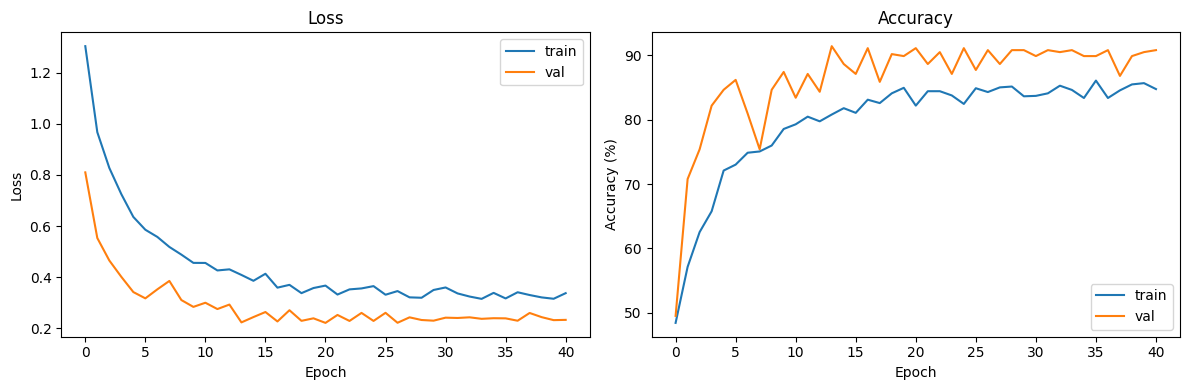

Confusion matrix:
 [[152  18]
 [  7 149]]

Classification Report:
              precision    recall  f1-score   support

        NIBM       0.96      0.89      0.92       170
    Non-NIBM       0.89      0.96      0.92       156

    accuracy                           0.92       326
   macro avg       0.92      0.92      0.92       326
weighted avg       0.93      0.92      0.92       326

 Best model saved to: /home/yukthi-de/Desktop/TEST CW_2/numberplate/Final_Test /model/APEXAI.pth


In [5]:
import os
import copy
import random
import warnings

import numpy as np
from PIL import Image
from tqdm import tqdm

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, WeightedRandomSampler
from torchvision import datasets, transforms, models

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.utils import shuffle as sk_shuffle
import matplotlib.pyplot as plt


SEED = 42
random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

data_dir = '/home/yukthi-de/Desktop/TEST CW_2/numberplate/Final_Test /Dataset'  
save_path = '/home/yukthi-de/Desktop/TEST CW_2/numberplate/Final_Test /model/APEXAI.pth'
os.makedirs(os.path.dirname(save_path), exist_ok=True)

IMG_SIZE = (224, 224)       
BATCH_SIZE = 32
NUM_WORKERS = 4
LR = 5e-4
WEIGHT_DECAY = 1e-4
NUM_EPOCHS = 60
PATIENCE = 20   

class ImageFolderWithPaths(Dataset):
    def __init__(self, samples, classes, transform=None):
        """
        samples: list of (path, class_idx)
        classes: list of class names
        """
        self.samples = samples
        self.classes = classes
        self.transform = transform

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        path, label = self.samples[idx]
        img = Image.open(path).convert("RGB")
        if self.transform:
            img = self.transform(img)
        return img, label


base = datasets.ImageFolder(data_dir)  
all_samples = base.samples  
classes = base.classes
num_classes = len(classes)
total_samples = len(all_samples)
if total_samples == 0:
    raise RuntimeError(f"No images found in {data_dir}")

print(f"Found {total_samples} images across {num_classes} classes: {classes}")


indices = np.arange(total_samples)
np.random.shuffle(indices)

train_size = int(0.7 * total_samples)
val_size = int(0.15 * total_samples)
test_size = total_samples - train_size - val_size

train_idx = indices[:train_size]
val_idx = indices[train_size:train_size + val_size]
test_idx = indices[train_size + val_size:]

train_samples = [all_samples[i] for i in train_idx]
val_samples = [all_samples[i] for i in val_idx]
test_samples = [all_samples[i] for i in test_idx]


imagenet_mean = [0.485, 0.456, 0.406]
imagenet_std  = [0.229, 0.224, 0.225]

train_transforms = transforms.Compose([
    transforms.Resize(IMG_SIZE),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.1, hue=0.02),
    transforms.ToTensor(),
    transforms.Normalize(mean=imagenet_mean, std=imagenet_std)
])

val_test_transforms = transforms.Compose([
    transforms.Resize(IMG_SIZE),
    transforms.ToTensor(),
    transforms.Normalize(mean=imagenet_mean, std=imagenet_std)
])

train_dataset = ImageFolderWithPaths(train_samples, classes, transform=train_transforms)
val_dataset   = ImageFolderWithPaths(val_samples, classes, transform=val_test_transforms)
test_dataset  = ImageFolderWithPaths(test_samples, classes, transform=val_test_transforms)


train_labels = [label for _, label in train_samples]
class_counts = np.bincount(train_labels, minlength=num_classes)
print("Train class counts:", dict(enumerate(class_counts)))


if (class_counts == 0).any():
    missing = np.where(class_counts == 0)[0].tolist()
    warnings.warn(f"Classes with no train samples: {missing}. These classes will have zero weight in loss.")

class_weights = np.zeros(num_classes, dtype=np.float32)
nonzero = class_counts > 0
total_train = class_counts.sum()
class_weights[nonzero] = total_train / class_counts[nonzero]
class_weights[~nonzero] = 0.0


sample_weights = [float(class_weights[label]) for _, label in train_samples]
sampler = WeightedRandomSampler(weights=sample_weights, num_samples=len(sample_weights), replacement=True)

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, sampler=sampler, num_workers=NUM_WORKERS, pin_memory=torch.cuda.is_available())
val_loader   = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=NUM_WORKERS, pin_memory=torch.cuda.is_available())
test_loader  = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=NUM_WORKERS, pin_memory=torch.cuda.is_available())


try:
    
    weights = models.ResNet18_Weights.DEFAULT
    model = models.resnet18(weights=weights)
except Exception:
    
    model = models.resnet18(pretrained=True)

# Freeze backbone
for param in model.parameters():
    param.requires_grad = False


num_ftrs = model.fc.in_features
model.fc = nn.Sequential(
    nn.Dropout(0.5),
    nn.Linear(num_ftrs, num_classes)
)

nn.init.kaiming_normal_(model.fc[1].weight)
if model.fc[1].bias is not None:
    nn.init.constant_(model.fc[1].bias, 0.0)

for param in model.fc.parameters():
    param.requires_grad = True

model = model.to(device)


weight_tensor = torch.from_numpy(class_weights).float()
if torch.cuda.is_available():
    weight_tensor = weight_tensor.to(device)

criterion = nn.CrossEntropyLoss(weight=weight_tensor)
optimizer = optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=LR, weight_decay=WEIGHT_DECAY)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=5)


class EarlyStopping:
    def __init__(self, patience=10, verbose=False):
        self.patience = patience
        self.verbose = verbose
        self.best_loss = None
        self.counter = 0
        self.early_stop = False

    def __call__(self, val_loss):
        if self.best_loss is None or val_loss < self.best_loss - 1e-6:
            self.best_loss = val_loss
            self.counter = 0
            if self.verbose:
                print(f"Validation loss improved to {val_loss:.4f}")
            return True
        else:
            self.counter += 1
            if self.verbose:
                print(f"No improvement in val loss for {self.counter} epochs (patience={self.patience})")
            if self.counter >= self.patience:
                self.early_stop = True
            return False

early_stopping = EarlyStopping(patience=PATIENCE, verbose=True)


best_val_loss = float('inf')
best_model_wts = None

train_losses, val_losses = [], []
train_accs, val_accs = [], []

for epoch in range(NUM_EPOCHS):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    loop = tqdm(train_loader, desc=f"Epoch {epoch+1}/{NUM_EPOCHS} - train", leave=False)
    for images, labels in loop:
        images = images.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * images.size(0)
        preds = outputs.argmax(dim=1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)

        loop.set_postfix(loss=running_loss / total, acc=100.0 * correct / total)

    epoch_train_loss = running_loss / total
    epoch_train_acc = correct / total
    train_losses.append(epoch_train_loss)
    train_accs.append(epoch_train_acc)

    model.eval()
    val_running_loss = 0.0
    val_correct = 0
    val_total = 0
    with torch.no_grad():
        for images, labels in val_loader:
            images = images.to(device)
            labels = labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)

            val_running_loss += loss.item() * images.size(0)
            preds = outputs.argmax(dim=1)
            val_correct += (preds == labels).sum().item()
            val_total += labels.size(0)

    epoch_val_loss = val_running_loss / max(val_total, 1)
    epoch_val_acc = val_correct / max(val_total, 1)
    val_losses.append(epoch_val_loss)
    val_accs.append(epoch_val_acc)

    print(f"Epoch {epoch+1}/{NUM_EPOCHS} | Train Loss: {epoch_train_loss:.4f}, Train Acc: {epoch_train_acc*100:.2f}% | "
          f"Val Loss: {epoch_val_loss:.4f}, Val Acc: {epoch_val_acc*100:.2f}%")

    scheduler.step(epoch_val_loss)
    improved = early_stopping(epoch_val_loss)

    if epoch_val_loss < best_val_loss:
        best_val_loss = epoch_val_loss
        best_model_wts = copy.deepcopy(model.state_dict())

    if early_stopping.early_stop:
        print(f"Early stopping at epoch {epoch+1}")
        break


if best_model_wts is not None:
    model.load_state_dict(best_model_wts)
    print("Loaded best model weights (val loss {:.4f})".format(best_val_loss))


plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='train')
plt.plot(val_losses, label='val')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss')

plt.subplot(1, 2, 2)
plt.plot([a * 100 for a in train_accs], label='train')
plt.plot([a * 100 for a in val_accs], label='val')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.title('Accuracy')

plt.tight_layout()
plt.show()


all_preds = []
all_labels = []
model.eval()
with torch.no_grad():
    for images, labels in tqdm(test_loader, desc="Testing", leave=False):
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        preds = outputs.argmax(dim=1)
        all_preds.extend(preds.cpu().numpy().tolist())
        all_labels.extend(labels.cpu().numpy().tolist())

cm = confusion_matrix(all_labels, all_preds, labels=list(range(num_classes)))
print("Confusion matrix:\n", cm)

print("\nClassification Report:")
print(classification_report(all_labels, all_preds, target_names=classes, zero_division=0))


torch.save(model.state_dict(), save_path)
print(f" Best model saved to: {save_path}")


def predict_image(image_path, model, transform, class_names):
    img = Image.open(image_path).convert('RGB')
    inp = transform(img).unsqueeze(0).to(device)
    model.eval()
    with torch.no_grad():
        out = model(inp)
        probs = torch.softmax(out, dim=1)
        conf, pred = probs.max(dim=1)
        pred_idx = int(pred.item())
        conf_val = float(conf.item())
    print(f"Prediction: {class_names[pred_idx]} ({conf_val*100:.2f}%)")
    plt.imshow(np.array(img))
    plt.title(f"{class_names[pred_idx]} ({conf_val*100:.1f}%)")
    plt.axis('off')
    plt.show()


In [ ]:
import os
import os

# saving class name
save_path = "/home/yukthi-de/Desktop/TEST CW_2/numberplate/Final_Test /model"
classes = ["NIBM", "Non-NIBM"]

save_dir = os.path.dirname(save_path)
os.makedirs(save_dir, exist_ok=True)

labels_txt = os.path.join(save_dir, "classes.txt")
with open(labels_txt, "w") as f:
    for c in classes:
        f.write(str(c) + "\n")  

print(f" Saved classes to: {labels_txt}")


 Saved classes to: /home/yukthi-de/Desktop/TEST CW_2/numberplate/Final_Test /classes.txt


webcam


In [ ]:
import cv2
import torch
import numpy as np
from PIL import Image
from torchvision import transforms, models
import os

model_path = '/home/yukthi-de/Desktop/TEST CW_2/numberplate/Final_Test /model/APEXAI.pth'
classes_path = '/home/yukthi-de/Desktop/TEST CW_2/numberplate/Final_Test /model/classes.txt'
IMG_SIZE = (224, 224)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

with open(classes_path, "r") as f:
    class_names = [line.strip() for line in f.readlines()]


imagenet_mean = [0.485, 0.456, 0.406]
imagenet_std  = [0.229, 0.224, 0.225]

transform = transforms.Compose([
    transforms.Resize(IMG_SIZE),
    transforms.ToTensor(),
    transforms.Normalize(mean=imagenet_mean, std=imagenet_std)
])


weights = models.ResNet18_Weights.DEFAULT
model = models.resnet18(weights=weights)

num_ftrs = model.fc.in_features
model.fc = torch.nn.Sequential(
    torch.nn.Dropout(0.5),
    torch.nn.Linear(num_ftrs, len(class_names))
)

model.load_state_dict(torch.load(model_path, map_location=device))
model = model.to(device)
model.eval()

print(f"Model loaded on {device}. Classes: {class_names}")


cap = cv2.VideoCapture(2)  
if not cap.isOpened():
    print("Error: Could not open webcam.")
    exit()

while True:
    ret, frame = cap.read()
    if not ret:
        break

    
    img_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    pil_img = Image.fromarray(img_rgb)

    
    inp = transform(pil_img).unsqueeze(0).to(device)
    with torch.no_grad():
        out = model(inp)
        probs = torch.softmax(out, dim=1)
        conf, pred = probs.max(dim=1)

    pred_class = class_names[pred.item()]
    conf_val = conf.item() * 100

    
    text = f"{pred_class} ({conf_val:.1f}%)"
    color = (0, 255, 0) if pred_class.lower() == "nibm" else (0, 0, 255)
    cv2.putText(frame, text, (20, 40), cv2.FONT_HERSHEY_SIMPLEX, 1, color, 2)

    cv2.imshow("NIBM vs Non-NIBM Detection", frame)

    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


Model loaded on cuda. Classes: ['NIBM', 'Non-NIBM']


dashboard with API 

In [23]:
import os
import cv2
import sqlite3
import threading
import base64
import time
import numpy as np
from datetime import datetime
import pandas as pd
from PIL import Image
import pytesseract
import requests

import dash
from dash import html, dcc, dash_table, Input, Output, State
import dash_bootstrap_components as dbc


MODEL_PATH   = '/home/yukthi-de/Desktop/TEST CW_2/numberplate/Final_Test /model/APEXAI.pth'
CLASSES_PATH = '/home/yukthi-de/Desktop/TEST CW_2/numberplate/Final_Test /model/classes.txt'
DB_PATH      = '/home/yukthi-de/Desktop/TEST CW_2/numberplate/Final_Test /model/numberplate.db'
CSV_PATH     = '/home/yukthi-de/Desktop/TEST CW_2/numberplate/Final_Test /model/detections.csv'
CAPTURE_DIR  = '/home/yukthi-de/Desktop/TEST CW_2/numberplate/Final_Test /capture/captures'
CAMERA_INDEX = 2
SAVE_MAX     = 5000
API_URL      = "http://localhost:8000/predict"  

os.makedirs(os.path.dirname(DB_PATH), exist_ok=True)
os.makedirs(CAPTURE_DIR, exist_ok=True)


DB_LOCK = threading.Lock()
DB_CONN = None

def init_db():
    global DB_CONN
    DB_CONN = sqlite3.connect(DB_PATH, check_same_thread=False)
    with DB_LOCK:
        DB_CONN.execute("""
            CREATE TABLE IF NOT EXISTS detections (
                id INTEGER PRIMARY KEY AUTOINCREMENT,
                plate_text TEXT,
                plate_image BLOB,
                detection_time TEXT,
                category TEXT,
                confidence REAL
            )
        """)
        DB_CONN.commit()
    
    if not os.path.exists(CSV_PATH):
        pd.DataFrame(columns=["detection_time","category"]).to_csv(CSV_PATH, index=False)

def ensure_db_conn():
    global DB_CONN
    try:
        if DB_CONN is None:
            DB_CONN = sqlite3.connect(DB_PATH, check_same_thread=False)
        else:
            DB_CONN.execute("SELECT 1")
    except Exception:
        DB_CONN = sqlite3.connect(DB_PATH, check_same_thread=False)

def insert_detection(plate_text, plate_image_bgr, category, confidence):
    ensure_db_conn()
    _, buf = cv2.imencode('.jpg', plate_image_bgr)
    blob = buf.tobytes()
    now_str = datetime.now().strftime('%Y-%m-%d %H:%M:%S')

    with DB_LOCK:
        DB_CONN.execute(
            "INSERT INTO detections (plate_text, plate_image, detection_time, category, confidence) VALUES (?, ?, ?, ?, ?)",
            (plate_text, blob, now_str, category, float(confidence))
        )
        DB_CONN.commit()
        DB_CONN.execute("DELETE FROM detections WHERE id NOT IN (SELECT id FROM detections ORDER BY id DESC LIMIT ?)",
                        (SAVE_MAX,))
        DB_CONN.commit()

    
    img_filename = os.path.join(CAPTURE_DIR, f"plate_{datetime.now().strftime('%Y%m%d_%H%M%S')}.jpg")
    cv2.imwrite(img_filename, plate_image_bgr)

    
    new_row = pd.DataFrame([[now_str, category]], columns=["detection_time","category"])
    new_row.to_csv(CSV_PATH, mode='a', header=False, index=False)

def fetch_latest(limit=50):
    ensure_db_conn()
    q = "SELECT id, plate_text, plate_image, detection_time, category, confidence FROM detections ORDER BY id DESC LIMIT ?"
    with DB_LOCK:
        df = pd.read_sql_query(q, DB_CONN, params=(limit,))
    return df

def count_by(filter_sql="", params=()):
    ensure_db_conn()
    with DB_LOCK:
        cur = DB_CONN.cursor()
        cur.execute(f"SELECT COUNT(*) FROM detections {filter_sql}", params)
        return cur.fetchone()[0]


cap = None
camera_active = False
latest_frame = None
latest_preview_b64 = None
latest_status = "-"
latest_time = "-"
latest_conf = 0.0
latest_plate_text = "-"
frame_lock = threading.Lock()
camera_thread_obj = None

def start_camera_thread(index=CAMERA_INDEX):
    global cap, camera_active, camera_thread_obj
    if camera_active:
        return True, "Camera already running"
    try:
        cap = cv2.VideoCapture(index)
        time.sleep(1.0)
        if not cap or not cap.isOpened():
            return False, f"Failed to open camera index {index}."
        camera_active = True
        camera_thread_obj = threading.Thread(target=_camera_loop, daemon=True)
        camera_thread_obj.start()
        return True, f"Camera {index} started"
    except Exception as e:
        return False, f"Camera start error: {e}"

def _camera_loop():
    global cap, camera_active, latest_frame
    while camera_active:
        if cap is None:
            break
        ret, frame = cap.read()
        if not ret:
            time.sleep(0.05)
            continue
        with frame_lock:
            latest_frame = frame.copy()
        time.sleep(0.02)

def stop_camera_thread():
    global cap, camera_active
    camera_active = False
    time.sleep(0.1)
    if cap is not None:
        try:
            cap.release()
        except Exception:
            pass
        cap = None
    return "Camera stopped (DB remains connected)."

def bgr_to_datauri(img_bgr, max_w=800):
    if img_bgr is None:
        return ""
    h, w = img_bgr.shape[:2]
    if w > max_w:
        scale = max_w / w
        img_bgr = cv2.resize(img_bgr, (int(w*scale), int(h*scale)))
    _, buf = cv2.imencode(".jpg", img_bgr, [int(cv2.IMWRITE_JPEG_QUALITY), 85])
    return "data:image/jpeg;base64," + base64.b64encode(buf).decode()


def capture_plate_from_frame_api():
    global latest_frame, latest_preview_b64, latest_status, latest_time, latest_conf, latest_plate_text
    with frame_lock:
        frame = None if latest_frame is None else latest_frame.copy()
    if frame is None:
        return False, "No camera frame."

    
    _, buf = cv2.imencode(".jpg", frame)
    img_bytes = buf.tobytes()

    
    try:
        response = requests.post(API_URL, files={"file": ("plate.jpg", img_bytes, "image/jpeg")})
        res_json = response.json()
        cls_name = res_json.get("class", "Unknown")
        conf_val = res_json.get("confidence", 0.0)
    except Exception as e:
        cls_name = "Unknown"
        conf_val = 0.0
        print("API call failed:", e)

    
    try:
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        _, thresh = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY)
        plate_text = pytesseract.image_to_string(thresh, config="--psm 7").strip()
        if not plate_text:
            plate_text = "-"
    except:
        plate_text = "-"

    
    insert_detection(plate_text, frame, cls_name, conf_val)

    latest_preview_b64 = bgr_to_datauri(frame)
    latest_status = cls_name
    latest_conf = conf_val
    latest_time = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
    latest_plate_text = plate_text
    return True, "Captured via API"


app = dash.Dash(__name__, external_stylesheets=[dbc.themes.DARKLY])
app.title = "Apex AI – Number Plate Monitoring"

def kpi_card(title, value, color="primary"):
    return dbc.Card(dbc.CardBody([html.H6(title), html.H3(value)]),
                    className=f"bg-{color} bg-opacity-10 shadow-sm", style={"textAlign":"center"})

app.layout = dbc.Container([
    dbc.Navbar(html.H4("Apex AI – Number Plate Monitoring", className="text-white"), color="dark", dark=True),
    dbc.Row([dbc.Col(id="kpi-total"), dbc.Col(id="kpi-today"), dbc.Col(id="kpi-nibm"), dbc.Col(id="kpi-non")]),
    dbc.Row([
        dbc.Col([html.Img(id="live-img", style={"width":"100%"}), html.Div(id="live-meta")], width=5),
        dbc.Col([dash_table.DataTable(id="history-table", page_size=8)], width=7)
    ]),
    dbc.Row([
        dbc.Button("Start Camera", id="start-btn", color="success", className="me-2"),
        dbc.Button("Capture Plate", id="capture-btn", color="info", className="me-2"),
        dbc.Button("Stop Camera", id="stop-btn", color="danger"),
        dbc.Button("Refresh Table", id="refresh-btn", color="secondary", className="ms-3"),
        html.Div(id="camera-message", className="ms-3")
    ]),
    dcc.Interval(id="tick", interval=1000),
    dcc.Store(id="camera-store", data={"active": False})
], fluid=True)


@app.callback(
    Output("camera-store", "data"), Output("camera-message", "children"),
    Input("start-btn", "n_clicks"), Input("stop-btn", "n_clicks"),
    State("camera-store", "data"), prevent_initial_call=True
)
def cam_control(start, stop, store):
    ctx = dash.callback_context
    if not ctx.triggered:
        raise dash.exceptions.PreventUpdate
    if ctx.triggered[0]["prop_id"].startswith("start"):
        success, msg = start_camera_thread()
        store["active"] = success
        return store, msg
    else:
        msg = stop_camera_thread()
        store["active"] = False
        return store, msg

@app.callback(
    Output("live-img","src"), Output("live-meta","children"),
    Output("history-table","data"),
    Output("kpi-total","children"), Output("kpi-today","children"),
    Output("kpi-nibm","children"), Output("kpi-non","children"),
    Input("tick","n_intervals"), Input("capture-btn","n_clicks"),
    Input("refresh-btn","n_clicks"),
    State("camera-store","data"), prevent_initial_call=False
)
def refresh(tick, capture, refresh_btn, store):
    ctx = dash.callback_context
    triggered_id = ctx.triggered[0]["prop_id"].split(".")[0] if ctx.triggered else None

    
    if triggered_id == "capture-btn" and store.get("active", False):
        capture_plate_from_frame_api()

    
    img_src = ""
    with frame_lock:
        if latest_frame is not None:
            img_src = bgr_to_datauri(latest_frame)
    if not img_src and latest_preview_b64:
        img_src = latest_preview_b64

    
    meta = [html.H5(f"Plate: {latest_plate_text}"),
            html.Div(f"Status: {latest_status}"),
            html.Div(f"Confidence: {latest_conf:.1f}%"),
            html.Div(f"Time: {latest_time}")]

    
    try:
        df = fetch_latest()
        if not df.empty and "plate_image" in df.columns:
            df = df[["detection_time","category"]] 
        table_data = df.to_dict("records")
    except:
        table_data = []

    return (img_src, meta, table_data,
            kpi_card("Total", count_by(), "secondary"),
            kpi_card("Today", count_by('WHERE DATE(detection_time)=DATE("now","localtime")'), "info"),
            kpi_card("NIBM", count_by('WHERE category=?',('NIBM',)), "success"),
            kpi_card("Non-NIBM", count_by('WHERE category=?',('Non-NIBM',)), "danger"))


if __name__ == "__main__":
    init_db()
    app.run(debug=True, host="0.0.0.0", port=8050)


piechart


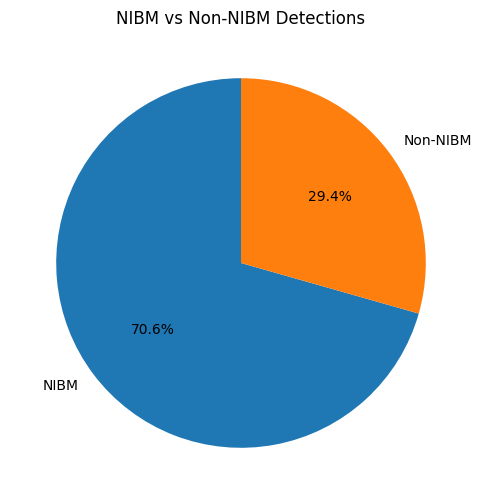

In [24]:
import pandas as pd
import matplotlib.pyplot as plt


csv_path = "/home/yukthi-de/Desktop/TEST CW_2/numberplate/Final_Test /model/detections.csv"
df = pd.read_csv(csv_path)

counts = df["category"].value_counts()

plt.figure(figsize=(6,6))
plt.pie(counts, labels=counts.index, autopct="%1.1f%%", startangle=90)
plt.title("NIBM vs Non-NIBM Detections")
plt.show()


API 